## 13.5 Including higher-order terms and interaction terms in a linear regression model

As we have already discussed, linear regression assumes that the relationship between the outcome and the independent variables is linear. As we already know, this is not always the case in real data. For example, suppose we are interested in the association between weight and age. On average, the weight of young adults will increase with age. However, at a certain age, the average weight may start to decrease. In this case, the association between weight and age would follow a non-linear (upside-down) $u$-shape. It could still be possible to model this relationship within the linear regression framework, by adding a **second-order term** to the model. This procedure is known as **quadratic regression**. 

Now suppose we are interested in relating weight to age, sex and height (weight is the outcome and age, sex and height are the covariates). In this case, the estimated regression coefficient for height represents the effect of a unit increase in height on weight in people of the same age and sex. The model assumes that the coefficient relating weight to height is the same for all people of all ages and sexes. For example, that it is the same for two year old boys as in thirty-three year old women. But this is not necessarily true! It could be that the slope of the association between weight and height differs by sex and by age. If this is the case, we say there is an **interaction** between height and sex and between height and age. 

In this section we will first learn how non-linear relationships can be accounted for in quadratic regression, then learn how to include interaction terms in a linear regression model. 


### 13.5.1 The quadratic regression model 

The quadratic regression model is a multivariable regression model with two independent variables where the second variable is the square of the first variable. Algebraically:

$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon \text{ where } \epsilon \sim NID(0,\sigma^2)$$ 

Despite the fact that one of the variables is the square of the other, this is still a linear regression model because the expectation of the outcome is a linear function of both parameters. 

The figure below shows two scatter plots of the data used in Scenario A above. The plot on the left-hand side includes the fitted values of a linear regression model (with no higher-order terms included) and the right-hand side plot includes the fitted values of a quadratic regression model. By comparing the plots, we can see that the quadratic regression model does have a better fit, particularly at the extreme values of $X$. 

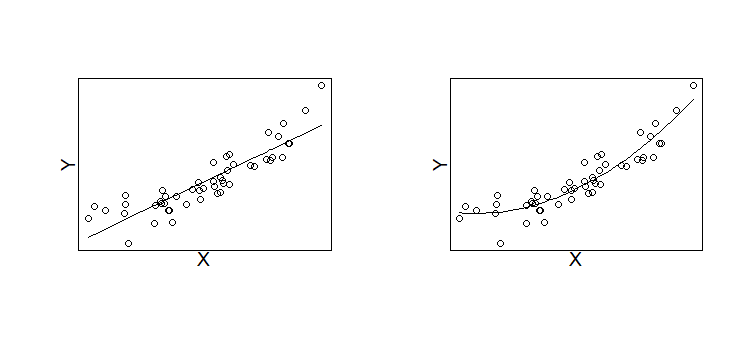

Unfortunately, interpreting $\beta_1$ and $\beta_2$ is not as straightforward as in most linear models. The reason for this is that it is not possible to change $X^2$ by 1 unit whilst holding $X$ constant (although it is possible the other way round). Moreover, quadratic regression models are limited in terms of describing relationships between variables in most medical applications. Quadratic functions either increase to a maximum and the decline, or fall to a minimum and then increase. Further, the behaviour of a quadratic is symmetric about the turning point. Such relationships in medical research are rarely plausible. 

However, the quadratic regression model can be useful as a test for non-linearity. Quadratic terms can be added to a regression model with more than one covariate, and if the results indicate that the quadratic term is an important variable, this is indicative of curvature in the relationship between the outcome and the variable of interest. This often motivates fitting a more realistic model to better describe the non-linear relationship.

*Example*. We will use quadratic regression to assess the linearity assumption for the covariates in Model 3 (recall Model 3 relates birthweight to length of pregnancy and mother's height). 




In [3]:
#Define the squared terms
data$Gestational.Days.squared<-data$Gestational.Days*data$Gestational.Days
data$Maternal.Height.squared<-data$Maternal.Height*data$Maternal.Height

#Quadratic regression to test the linearity between birthweight and gestational days
model_test1<-lm(data$Birth.Weight~data$Gestational.Days+data$Maternal.Height+data$Gestational.Days.squared)
summary(model_test1)

#Quadratic regression to test the linearity between birthweight and mother's height
model_test2<-lm(data$Birth.Weight~data$Gestational.Days+data$Maternal.Height+data$Maternal.Height.squared)
summary(model_test2)


Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + data$Maternal.Height + 
    data$Gestational.Days.squared)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.143 -10.666   0.306  10.095  67.692 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.592e+02  5.127e+01  -3.104  0.00195 ** 
data$Gestational.Days          9.689e-01  3.612e-01   2.682  0.00741 ** 
data$Maternal.Height           1.286e+00  1.905e-01   6.748 2.35e-11 ***
data$Gestational.Days.squared -9.487e-04  6.611e-04  -1.435  0.15155    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.43 on 1170 degrees of freedom
Multiple R-squared:  0.1983,	Adjusted R-squared:  0.1962 
F-statistic: 96.45 on 3 and 1170 DF,  p-value: < 2.2e-16



Call:
lm(formula = data$Birth.Weight ~ data$Gestational.Days + data$Maternal.Height + 
    data$Maternal.Height.squared)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.675 -10.432   0.325  10.002  54.188 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  300.38521  208.00423   1.444   0.1490    
data$Gestational.Days          0.45338    0.03003  15.098   <2e-16 ***
data$Maternal.Height         -10.91959    6.51008  -1.677   0.0937 .  
data$Maternal.Height.squared   0.09539    0.05090   1.874   0.0612 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.42 on 1170 degrees of freedom
Multiple R-squared:  0.1993,	Adjusted R-squared:  0.1972 
F-statistic: 97.05 on 3 and 1170 DF,  p-value: < 2.2e-16


The results indicate that the squared terms for gestational days and mother's height are not important (as indicated by lack of small $p$-values), therefore we can assume that linearity has not been violated. This is consistent with our conclusions based on the normal residual plot. 

In the next section, we briefly discuss some statistical options for modelling non-linear associations more realistically, when the linearity assumption is not met and the quadratic regression model is not appropriate. 


#### 13.5.1.1 More complex modelling of non-linear associations 

The quadratic regression model belongs to a family of **polynomial regression models** and is the simplest model in that family. Further power terms can be added to the regression model in order to increase complexity. For example, a cubic regression model is one which includes a cubic term as well as a squared term. 

An even more flexible approach is to use a **piecewise polynomial model**, which allows for a different polynomial function in different ranges of the observed values of $X$, defined according to specified **knots**. For example, a piecewise cubic polynomial model with two knots at $k_1$ and $k_2$ ($k_1 < k_2$) takes the form:

$$ y_i = 
\begin{cases}
\beta_{01} + \beta_{11}x_i + \beta_{21}x_i^2 + \beta_{31}x_i^3 + \epsilon_i \text{ when } x_i < k_1 \\
\beta_{02} + \beta_{12}x_i + \beta_{22}x_i^2 + \beta_{32}x_i^3 + \epsilon_i \text{ when } k_1 \leq x_i < k_2 \\
\beta_{03} + \beta_{13}x_i + \beta_{23}x_i^2 + \beta_{33}x_i^3 + \epsilon_i \text{ when } k_2 \geq x_i\\
\end{cases}
$$
 
The flexibility of the model (and therefore its ability to model more complex relationships) can be increased by increasing the degree of polynomial and/or the number of knots. However, highly flexible models may overfit the data and make the model difficult to interpret. In general, it is a good idea to consider an appropriate trade-off between flexibility and interpretability. 

